Загрузить данные Market_Basket_Optimisation.csv

In [94]:
import time

import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

read = pd.read_csv('Market_Basket_Optimisation.csv', names=range(20))

data = pd.DataFrame(read)

data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Визуализировать данные (отразить на гистограммах относительную и фактическую частоту встречаемости для 20 наиболее популярных товаров).

<AxesSubplot: >

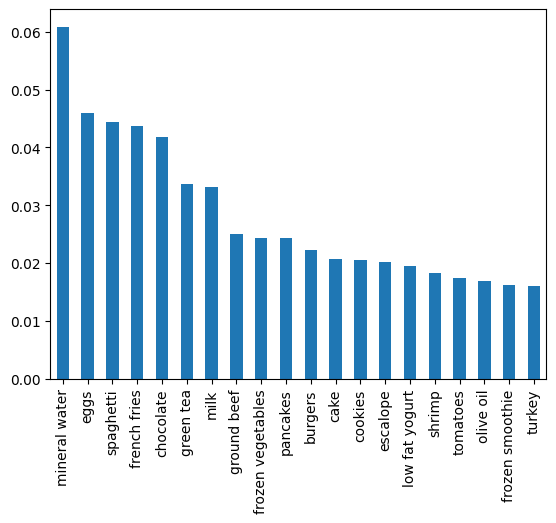

In [95]:
data.stack().value_counts(normalize=True)[0:20].plot(kind='bar') # Относительная частота

<AxesSubplot: >

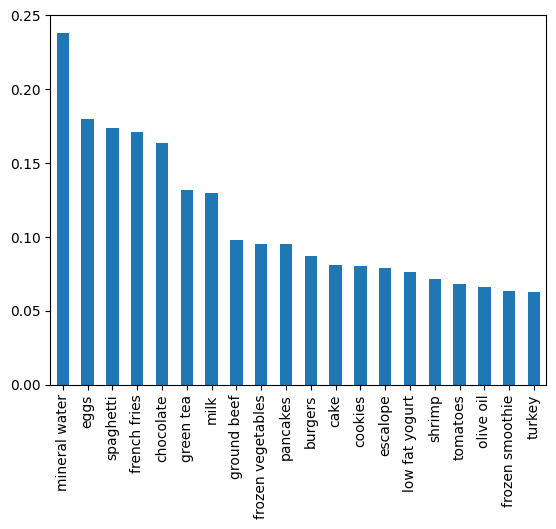

In [96]:
data.stack().value_counts().apply(lambda item: item / data.shape[0])[0:20].plot(kind='bar') # Фактическая частота

Применить алгоритм Apriori, используя 3 разные библиотеки(apriori_python, apyori, efficient_apriori).

In [97]:
transactions = []
for i in range(data.shape[0]):
    row = data.iloc[i].dropna().tolist()
    transactions.append(row)

transactions[0]

['shrimp',
 'almonds',
 'avocado',
 'vegetables mix',
 'green grapes',
 'whole weat flour',
 'yams',
 'cottage cheese',
 'energy drink',
 'tomato juice',
 'low fat yogurt',
 'green tea',
 'honey',
 'salad',
 'mineral water',
 'salmon',
 'antioxydant juice',
 'frozen smoothie',
 'spinach',
 'olive oil']

In [98]:
from apriori_python import apriori
import time

t = []
start = time.perf_counter()

t1, rules = apriori(transactions, minSup=0.04, minConf=0.1)
time1 = time.perf_counter() - start
t.append(time1)
rules

[[{'mineral water'}, {'ground beef'}, 0.17170022371364654],
 [{'mineral water'}, {'milk'}, 0.20134228187919462],
 [{'mineral water'}, {'eggs'}, 0.21364653243847875],
 [{'mineral water'}, {'chocolate'}, 0.220917225950783],
 [{'mineral water'}, {'spaghetti'}, 0.2505592841163311],
 [{'eggs'}, {'mineral water'}, 0.28338278931750743],
 [{'chocolate'}, {'mineral water'}, 0.3213995117982099],
 [{'spaghetti'}, {'mineral water'}, 0.3430321592649311],
 [{'milk'}, {'mineral water'}, 0.37037037037037035],
 [{'ground beef'}, {'mineral water'}, 0.41655359565807326]]

In [99]:
from apyori import apriori

start = time.perf_counter()
rules = apriori(transactions=transactions,
                min_support=0.04,
                min_confidence=0.1,
                min_lift=1.0001)

results = list(rules)
time2 = time.perf_counter() - start
t.append(time2)

for result in results:
    for subset in result[2]:
        print(subset[0], subset[1])
        print('Support: {0}; Confidence: {1}; Lift: {2}'.format(result[1], subset[2], subset[3]))
        print()

frozenset({'chocolate'}) frozenset({'mineral water'})
Support: 0.05265964538061592; Confidence: 0.3213995117982099; Lift: 1.3483320682317521

frozenset({'mineral water'}) frozenset({'chocolate'})
Support: 0.05265964538061592; Confidence: 0.220917225950783; Lift: 1.348332068231752

frozenset({'eggs'}) frozenset({'mineral water'})
Support: 0.05092654312758299; Confidence: 0.28338278931750743; Lift: 1.188844688294532

frozenset({'mineral water'}) frozenset({'eggs'})
Support: 0.05092654312758299; Confidence: 0.21364653243847875; Lift: 1.188844688294532

frozenset({'ground beef'}) frozenset({'mineral water'})
Support: 0.040927876283162246; Confidence: 0.41655359565807326; Lift: 1.7475215442008991

frozenset({'mineral water'}) frozenset({'ground beef'})
Support: 0.040927876283162246; Confidence: 0.17170022371364654; Lift: 1.7475215442008993

frozenset({'milk'}) frozenset({'mineral water'})
Support: 0.04799360085321957; Confidence: 0.3703703703703704; Lift: 1.5537741320739085

frozenset({'min

In [100]:
from efficient_apriori import apriori

start = time.perf_counter()
itemsets, rules = apriori(transactions, min_support=0.04, min_confidence=0.1)
time3 = time.perf_counter() - start
t.append(time3)

for i in range(len(rules)):
    print(rules[i])

{mineral water} -> {chocolate} (conf: 0.221, supp: 0.053, lift: 1.348, conv: 1.073)
{chocolate} -> {mineral water} (conf: 0.321, supp: 0.053, lift: 1.348, conv: 1.122)
{mineral water} -> {eggs} (conf: 0.214, supp: 0.051, lift: 1.189, conv: 1.043)
{eggs} -> {mineral water} (conf: 0.283, supp: 0.051, lift: 1.189, conv: 1.063)
{mineral water} -> {ground beef} (conf: 0.172, supp: 0.041, lift: 1.748, conv: 1.089)
{ground beef} -> {mineral water} (conf: 0.417, supp: 0.041, lift: 1.748, conv: 1.305)
{mineral water} -> {milk} (conf: 0.201, supp: 0.048, lift: 1.554, conv: 1.090)
{milk} -> {mineral water} (conf: 0.370, supp: 0.048, lift: 1.554, conv: 1.210)
{spaghetti} -> {mineral water} (conf: 0.343, supp: 0.060, lift: 1.439, conv: 1.159)
{mineral water} -> {spaghetti} (conf: 0.251, supp: 0.060, lift: 1.439, conv: 1.102)


Применить алгоритм FP-Growth из библиотеки fpgrowth_py

In [101]:
from fpgrowth_py import fpgrowth

start = time.perf_counter()
itemsets, rules = fpgrowth(transactions, minSupRatio=0.04, minConf=0.1)
time4 = time.perf_counter() - start
t.append(time4)

for i in range(len(rules)):
    print(rules[i])

[{'ground beef'}, {'mineral water'}, 0.41655359565807326]
[{'mineral water'}, {'ground beef'}, 0.17170022371364654]
[{'milk'}, {'mineral water'}, 0.37037037037037035]
[{'mineral water'}, {'milk'}, 0.20134228187919462]
[{'mineral water'}, {'chocolate'}, 0.220917225950783]
[{'chocolate'}, {'mineral water'}, 0.3213995117982099]
[{'mineral water'}, {'spaghetti'}, 0.2505592841163311]
[{'spaghetti'}, {'mineral water'}, 0.3430321592649311]
[{'eggs'}, {'mineral water'}, 0.28338278931750743]
[{'mineral water'}, {'eggs'}, 0.21364653243847875]


Сравнить время выполнения всех алгоритмов и построить гистограмму.

Время выполнения apriori:  1.1559519000002183 

Время выполнения apriori 2:  0.019836299994494766 

Время выполнения efficient_apriori:  0.019023299973923713 

Время выполнения fpgrowth:  0.24841890000971034 



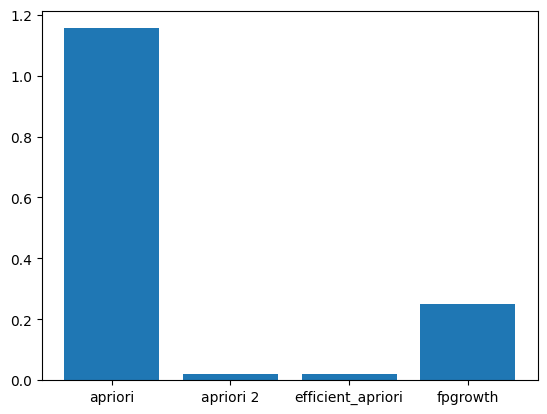

In [103]:
import matplotlib.pyplot as plt
print('Время выполнения apriori: ', t[0], '\n')
print('Время выполнения apriori 2: ', t[1], '\n')
print('Время выполнения efficient_apriori: ', t[2], '\n')
print('Время выполнения fpgrowth: ', t[3], '\n')
plt.bar(['apriori', 'apriori 2', 'efficient_apriori', 'fpgrowth'], t)
plt.show()

Загрузить данные data.csv

In [106]:
read = pd.read_csv('data.csv', names=range(12))

data = pd.DataFrame(read)

data

,0,1,2,3,4,5,6,7,8,9,10,11
0,Bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Scandinavian,Scandinavian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Hot chocolate,Jam,Cookies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Muffin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Coffee,Pastry,Bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9526,Bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9527,Truffles,Tea,Spanish Brunch,Christmas common,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9528,Muffin,Tacos/Fajita,Coffee,Tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9529,Coffee,Pastry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Визуализировать данные (отразить на гистограммах относительную и фактическую частоту встречаемости для 20 наиболее популярных товаров).

<AxesSubplot: >

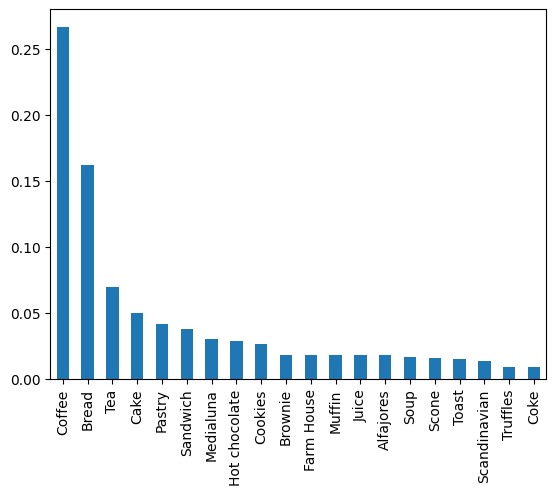

In [107]:
data.stack().value_counts(normalize=True)[0:20].plot(kind='bar') # Относительная частота

<AxesSubplot: >

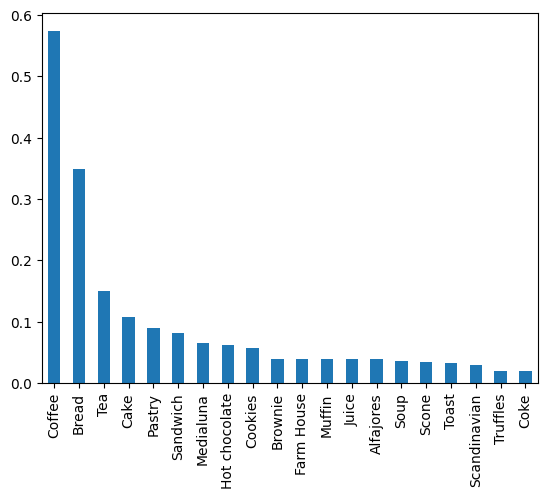

In [108]:
data.stack().value_counts().apply(lambda item: item / data.shape[0])[0:20].plot(kind='bar') # Фактическая частота

Применить алгоритм Apriori, используя 3 разные библиотеки(apriori_python, apyori, efficient_apriori).

In [109]:
transactions = []
for i in range(data.shape[0]):
    row = data.iloc[i].dropna().tolist()
    transactions.append(row)

In [111]:
from apriori_python import apriori
import time

t = []
start = time.perf_counter()

t1, rules = apriori(transactions, minSup=0.04, minConf=0.1)
time1 = time.perf_counter() - start
t.append(time1)
rules

[[{'Coffee'}, {'Tea'}, 0.10424028268551237],
 [{'Coffee'}, {'Cake'}, 0.11439929328621908],
 [{'Coffee'}, {'Bread'}, 0.1881625441696113],
 [{'Bread'}, {'Coffee'}, 0.27510494026477234],
 [{'Tea'}, {'Coffee'}, 0.3496296296296296],
 [{'Cake'}, {'Coffee'}, 0.5269582909460834],
 [{'Pastry'}, {'Coffee'}, 0.5521472392638037]]

In [112]:
from apyori import apriori

start = time.perf_counter()
rules = apriori(transactions=transactions,
                min_support=0.04,
                min_confidence=0.1,
                min_lift=1.0001)

results = list(rules)
time2 = time.perf_counter() - start
t.append(time2)

for result in results:
    for subset in result[2]:
        print(subset[0], subset[1])
        print('Support: {0}; Confidence: {1}; Lift: {2}'.format(result[1], subset[2], subset[3]))
        print()

frozenset({'Cake'}) frozenset({'Coffee'})
Support: 0.054348966530269646; Confidence: 0.5269582909460834; Lift: 1.1091959962471556

frozenset({'Coffee'}) frozenset({'Cake'})
Support: 0.054348966530269646; Confidence: 0.11439929328621908; Lift: 1.1091959962471556

frozenset({'Pastry'}) frozenset({'Coffee'})
Support: 0.047214353163361665; Confidence: 0.5521472392638037; Lift: 1.1622162847666326



In [113]:
from efficient_apriori import apriori

start = time.perf_counter()
itemsets, rules = apriori(transactions, min_support=0.04, min_confidence=0.1)
time3 = time.perf_counter() - start
t.append(time3)

for i in range(len(rules)):
    print(rules[i])

{Coffee} -> {Bread} (conf: 0.188, supp: 0.089, lift: 0.579, conv: 0.832)
{Bread} -> {Coffee} (conf: 0.275, supp: 0.089, lift: 0.579, conv: 0.724)
{Coffee} -> {Cake} (conf: 0.114, supp: 0.054, lift: 1.109, conv: 1.013)
{Cake} -> {Coffee} (conf: 0.527, supp: 0.054, lift: 1.109, conv: 1.110)
{Pastry} -> {Coffee} (conf: 0.552, supp: 0.047, lift: 1.162, conv: 1.172)
{Tea} -> {Coffee} (conf: 0.350, supp: 0.050, lift: 0.736, conv: 0.807)
{Coffee} -> {Tea} (conf: 0.104, supp: 0.050, lift: 0.736, conv: 0.958)


Применить алгоритм FP-Growth из библиотеки fpgrowth_py

In [114]:
from fpgrowth_py import fpgrowth

start = time.perf_counter()
itemsets, rules = fpgrowth(transactions, minSupRatio=0.04, minConf=0.1)
time4 = time.perf_counter() - start
t.append(time4)

for i in range(len(rules)):
    print(rules[i])

[{'Cookies'}, {'Coffee'}, 0.5184466019417475]
[{'Medialuna'}, {'Coffee'}, 0.5692307692307692]
[{'Sandwich'}, {'Coffee'}, 0.5323529411764706]
[{'Pastry'}, {'Coffee'}, 0.5521472392638037]
[{'Coffee'}, {'Cake'}, 0.11439929328621908]
[{'Cake'}, {'Coffee'}, 0.5269582909460834]
[{'Coffee'}, {'Tea'}, 0.10424028268551237]
[{'Tea'}, {'Coffee'}, 0.3496296296296296]
[{'Bread'}, {'Coffee'}, 0.27510494026477234]
[{'Coffee'}, {'Bread'}, 0.1881625441696113]


Сравнить время выполнения всех алгоритмов и построить гистограмму

Время выполнения apriori:  0.33507200004532933 

Время выполнения apriori 2:  0.010794399946462363 

Время выполнения efficient_apriori:  0.008720999991055578 

Время выполнения fpgrowth:  0.13799059996381402 



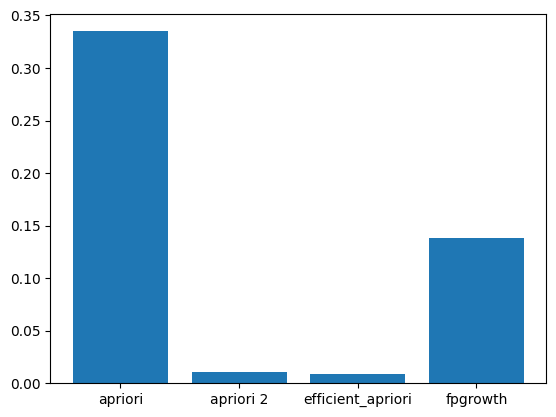

In [115]:
import matplotlib.pyplot as plt
print('Время выполнения apriori: ', t[0], '\n')
print('Время выполнения apriori 2: ', t[1], '\n')
print('Время выполнения efficient_apriori: ', t[2], '\n')
print('Время выполнения fpgrowth: ', t[3], '\n')
plt.bar(['apriori', 'apriori 2', 'efficient_apriori', 'fpgrowth'], t)
plt.show()